# Exploratiry Data Analysis - EDA 

In [1]:
# Libraries 
import pandas as pd
import numpy as np
import sys

# Plotting 
import matplotlib.pyplot as plt
import seaborn as sns


# Calling functions 
sys.path.insert(0, '../src/utils/')
import EDA

In [2]:
# Reading data 
data = pd.read_csv('../data/processed/data.csv')

In [3]:
data.shape

(3346, 106)

In [4]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
data.head()

,cms_zone,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,first_travel_date,...,no_bike_nyc_-9998,no_bike_nyc_999,bike_share_-9998,bike_share_999,disability_-9998,disability_999,no_bike_share_-9998,no_bike_share_999,race_-9998,race_999
0,Inner Brooklyn,23.0,1.0,3.0,11.0,0.0,0.0,2.0,5.0,06/24/2019,...,0,0,0,0,0,0,0,0,0,0
1,Middle Queens,15.0,2.0,1.0,0.0,0.0,0.0,2.0,5.0,05/29/2019,...,0,0,0,0,0,0,0,0,0,0
2,Middle Queens,30.0,22.0,9.0,0.0,0.0,0.0,2.0,5.0,06/06/2019,...,0,0,0,0,0,0,0,0,0,0
3,Middle Queens,48.0,23.0,13.0,0.0,0.0,0.0,2.0,2.0,06/16/2019,...,0,0,0,0,0,0,0,0,0,0
4,Middle Queens,45.0,13.0,6.0,12.0,0.0,2.0,2.0,5.0,06/08/2019,...,0,0,0,0,0,0,0,0,0,0


## Missing Data

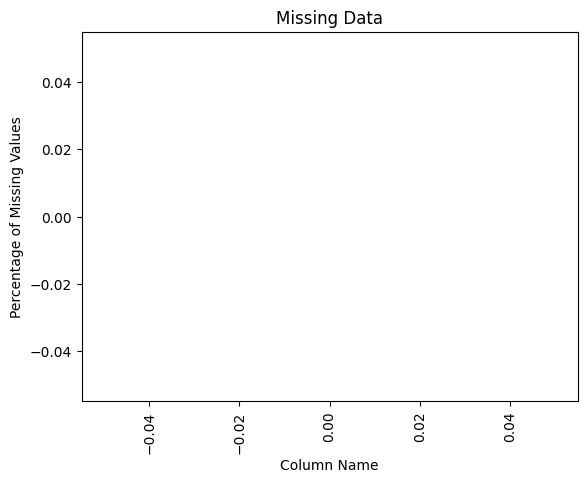

In [6]:
EDA.plt_missing_data(data, title="Missing Data")

#### Insights:
- No Missing data 
<br>PS: (This data is cleaned. You can see the cleaning process in "Cleaned data" branch)

## Univariate and Multivariate analysis

### Categorical features

In [7]:
# Checking the categorical data. 
categorical_features = data.select_dtypes(include=['object']).copy()
categorical_features.head()

,cms_zone,first_travel_date,last_travel_date,work_cms_zone
0,Inner Brooklyn,06/24/2019,06/30/2019,Manhattan Core
1,Middle Queens,05/29/2019,06/04/2019,Manhattan Core
2,Middle Queens,06/06/2019,06/12/2019,Manhattan Core
3,Middle Queens,06/16/2019,06/22/2019,Manhattan Core
4,Middle Queens,06/08/2019,06/14/2019,Inner Queens


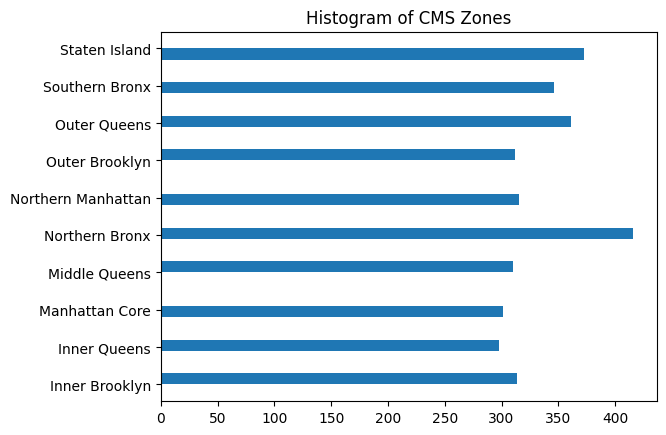

In [8]:
# CMS Zones
EDA.create_histogram(data["cms_zone"], orientation="horizontal", title="Histogram of CMS Zones")

#### Insights:
- Most number of applicants live in Northen Bronx and Staten Island.
- Propotion of the number of other applicants living in other zones is approximatly equivilant. 

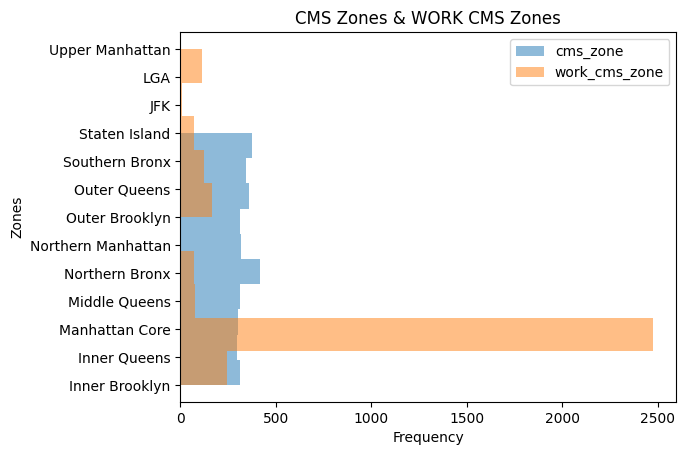

In [9]:
# CMS Zones & Work CMS Zones
EDA.create_stacked_histogram(data,"cms_zone","work_cms_zone",title="CMS Zones & WORK CMS Zones", orientation="horizontal", bins=10, xlabel="Frequency", ylabel="Zones")

#### Insights:
- Most Work CMS Zones come from Manhattan core, which is normal because Manhattan is considered one of the world's foremost commercial, financial, and cultural centres.

### Datetime features

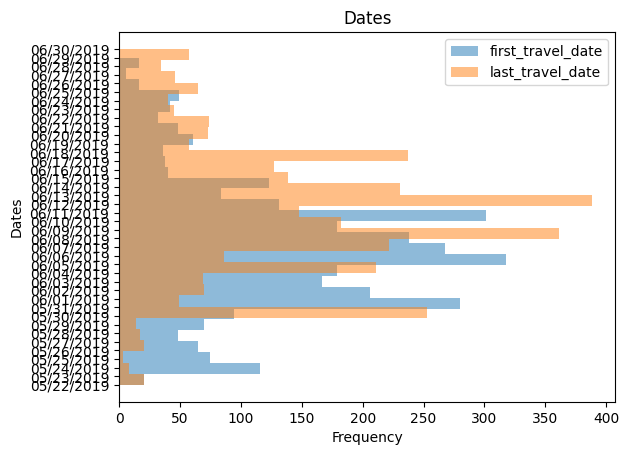

In [12]:
# First & Last Travel dates. 
EDA.create_stacked_histogram(data,"first_travel_date","last_travel_date",title="Dates", orientation="horizontal", bins=30, xlabel="Frequency", ylabel="Dates", sort=True)

#### Insights:
- Most of first travel dates were 06/07/2019. 
- Most of last travel dates were in 06/13/2019.

### Numerical Features

In [13]:
numerical_features = data.select_dtypes(include=["int", "float"]).copy()
numerical_features.head()

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,made_trips,smartphone_type,...,no_bike_nyc_-9998,no_bike_nyc_999,bike_share_-9998,bike_share_999,disability_-9998,disability_999,no_bike_share_-9998,no_bike_share_999,race_-9998,race_999
0,23.0,1.0,3.0,11.0,0.0,0.0,2.0,5.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
1,15.0,2.0,1.0,0.0,0.0,0.0,2.0,5.0,1.0,2,...,0,0,0,0,0,0,0,0,0,0
2,30.0,22.0,9.0,0.0,0.0,0.0,2.0,5.0,1.0,2,...,0,0,0,0,0,0,0,0,0,0
3,48.0,23.0,13.0,0.0,0.0,0.0,2.0,2.0,1.0,2,...,0,0,0,0,0,0,0,0,0,0
4,45.0,13.0,6.0,12.0,0.0,2.0,2.0,5.0,1.0,2,...,0,0,0,0,0,0,0,0,0,0


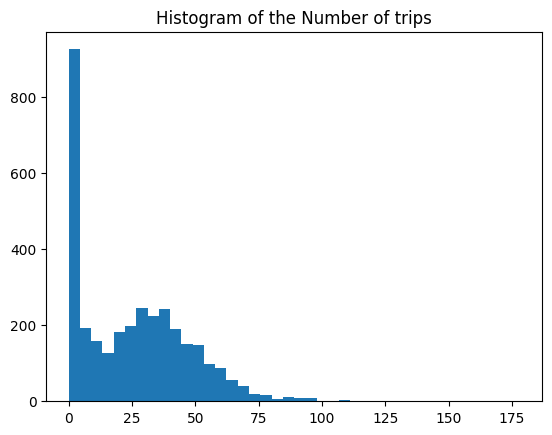

In [14]:
# Numerical features: Number of trips
EDA.create_histogram(data["num_trips"], title="Histogram of the Number of trips", bin=40)

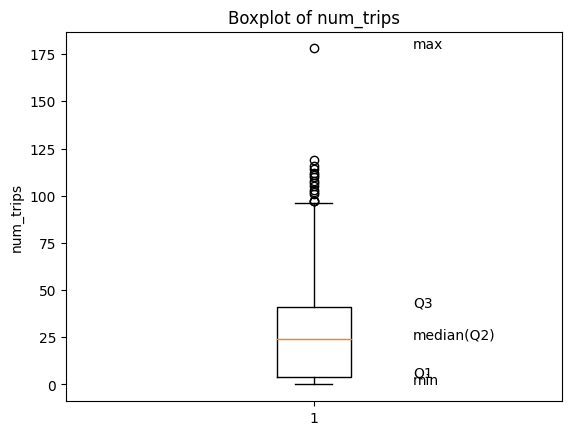

In [15]:
EDA.create_boxplot(data, "num_trips")

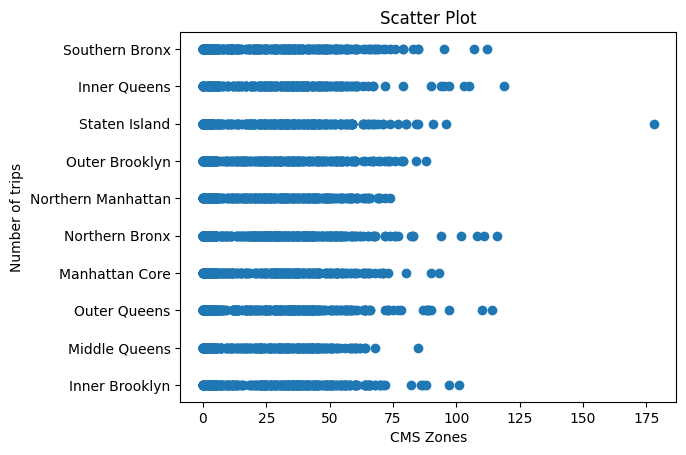

In [33]:
EDA.create_scatterplot(data["num_trips"], data["cms_zone"], title="Scatter Plot", xlabel="CMS Zones", ylabel="Number of trips")

### Insights:
- The mean value of the number of trips = 25. 
- The number of trips is left skewed; meaning that there are outliers. {max = 178 while the mean = 25}
- the minimum number of trips = 0
- the outlier -> 175 trips came from Staten Island, as long as we don't have other close values to 175 then this is an outlier


### Conclusions